# Name : Mukta Bhokare

# TITANIC SURVIVAL PREDICTION

# Codesoft internship (Task 1)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as sm 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
import warnings

In [3]:
data=pd.read_csv("tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
data.shape

(418, 12)

In [6]:
data.size

5016

In [8]:
data.head(500)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
data.isnull().values.any()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

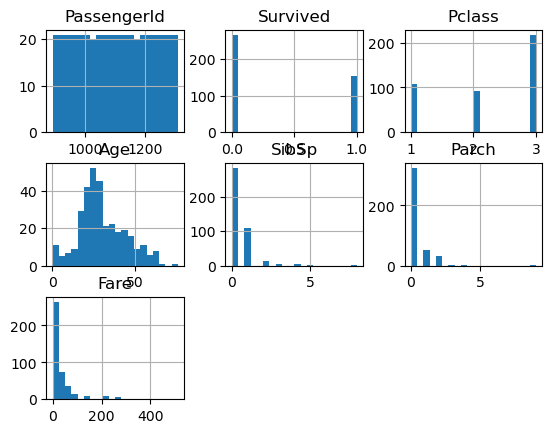

In [16]:
data.hist(bins=20)

In [18]:
# Data Cleaning
# Checking Null values
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence it is clean.

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

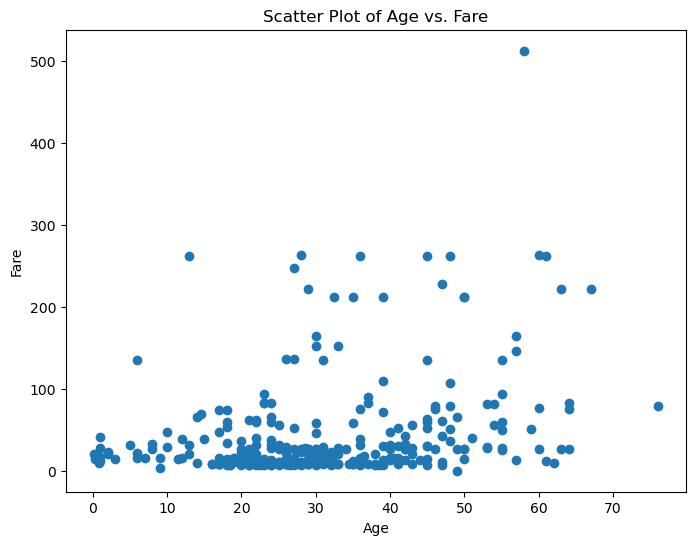

In [19]:
# Scatter Plot

plt.figure(figsize=(8, 6))
plt.scatter(data["Age"], data["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs. Fare")
plt.show()

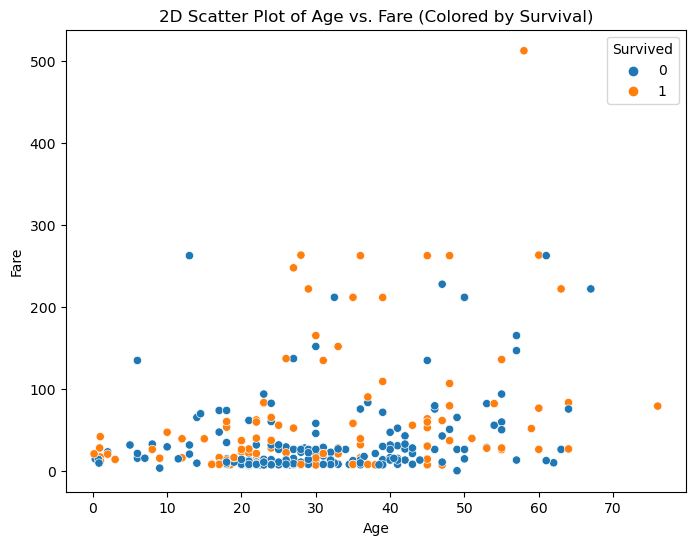

In [20]:
# 2D Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", data=data, hue="Survived")
plt.title("2D Scatter Plot of Age vs. Fare (Colored by Survival)")
plt.show()

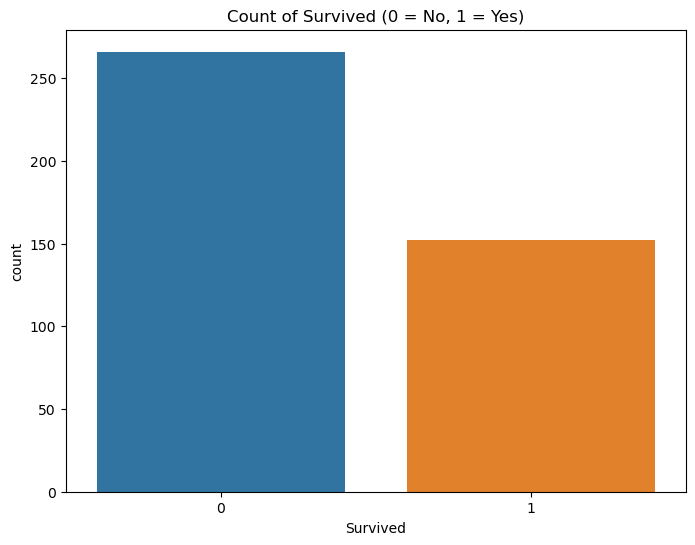

In [21]:
# Bar Plot

plt.figure(figsize=(8, 6))
sns.countplot(x="Survived", data=data)
plt.title("Count of Survived (0 = No, 1 = Yes)")
plt.show()


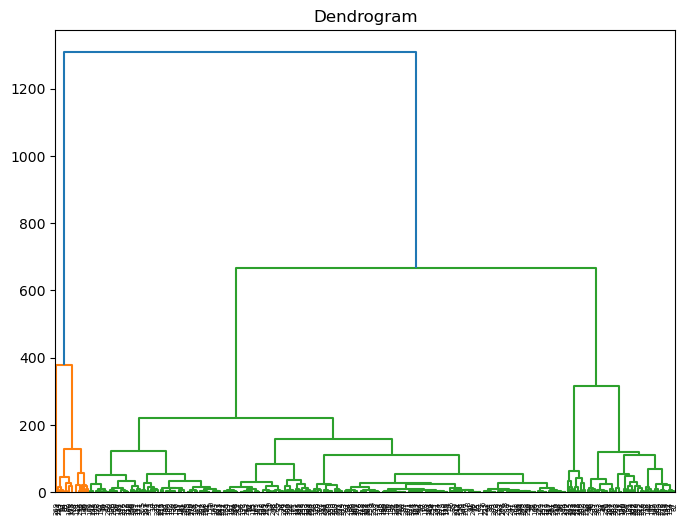

In [32]:
# Remove rows with missing values

data.dropna(subset=["Age", "Fare"], inplace=True)

# Dendrogram
plt.figure(figsize=(8, 6))
dendrogram = sch.dendrogram(sch.linkage(data[["Age", "Fare"]], method='ward'))
plt.title("Dendrogram")
plt.show()


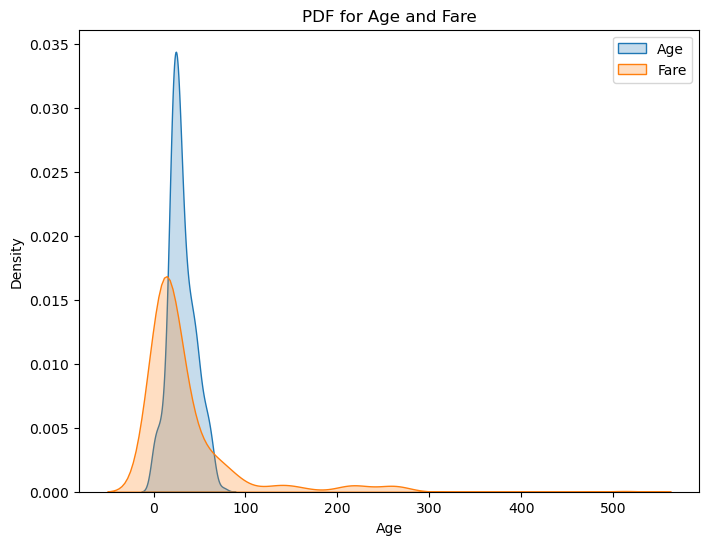

In [25]:
# PDF (Probability Density Function)

plt.figure(figsize=(8, 6))
sns.kdeplot(data["Age"], label="Age", fill=True)
sns.kdeplot(data["Fare"], label="Fare", fill=True)
plt.title("PDF for Age and Fare")
plt.legend()
plt.show()

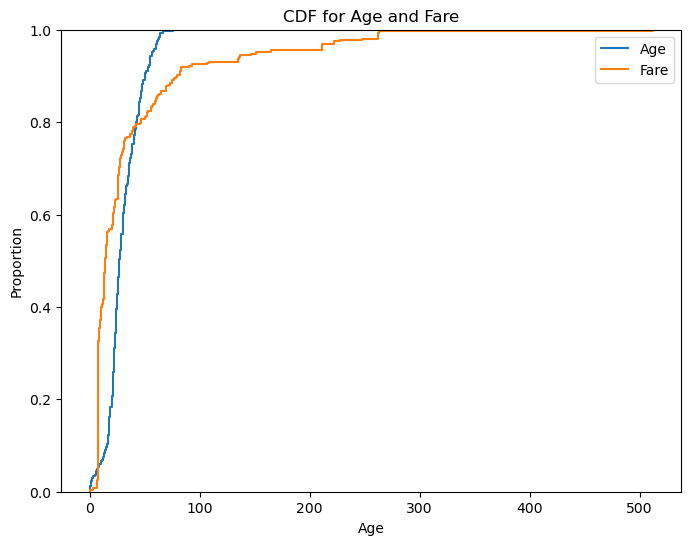

In [26]:
# CDF (Cumulative Distribution Function)

plt.figure(figsize=(8, 6))
sns.ecdfplot(data["Age"], label="Age")
sns.ecdfplot(data["Fare"], label="Fare")
plt.title("CDF for Age and Fare")
plt.legend()
plt.show()



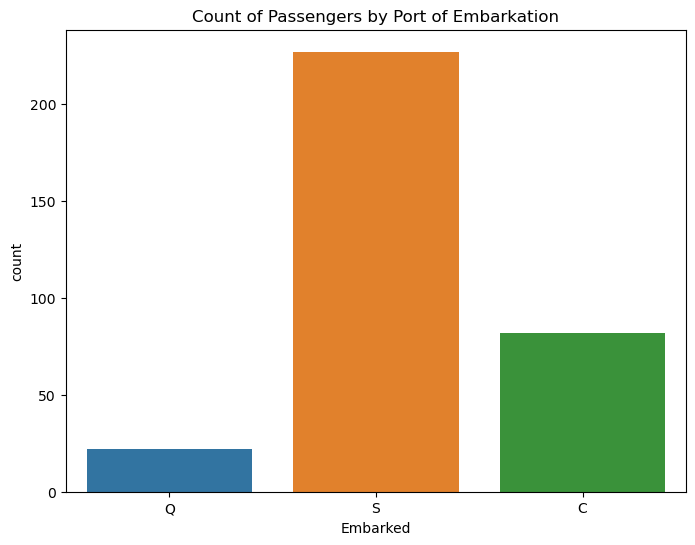

In [35]:
#Count Plot for Embarked

plt.figure(figsize=(8, 6))
sns.countplot(x="Embarked", data=data)
plt.title("Count of Passengers by Port of Embarkation")
plt.show()

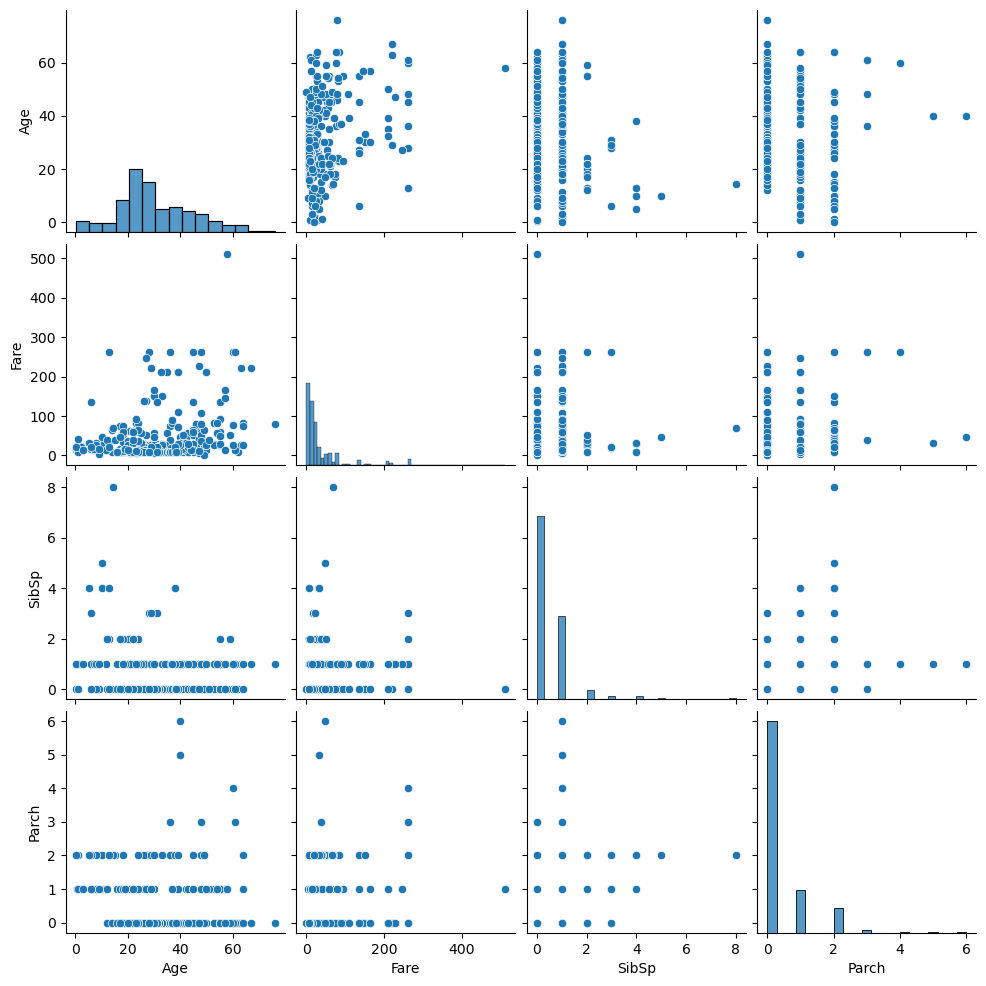

In [36]:
#Pairplot for numeric variables

sns.pairplot(data[["Age", "Fare", "SibSp", "Parch"]])
plt.show()

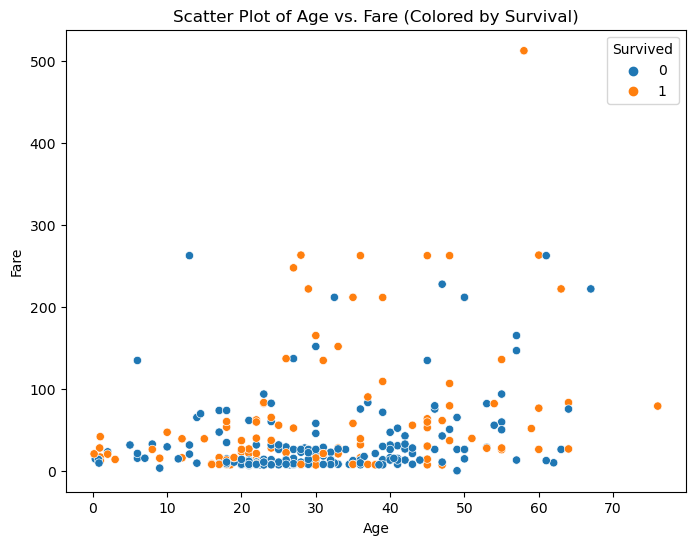

In [37]:
# Scatter Plot for Age vs. Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", data=data, hue="Survived")
plt.title("Scatter Plot of Age vs. Fare (Colored by Survival)")
plt.show()

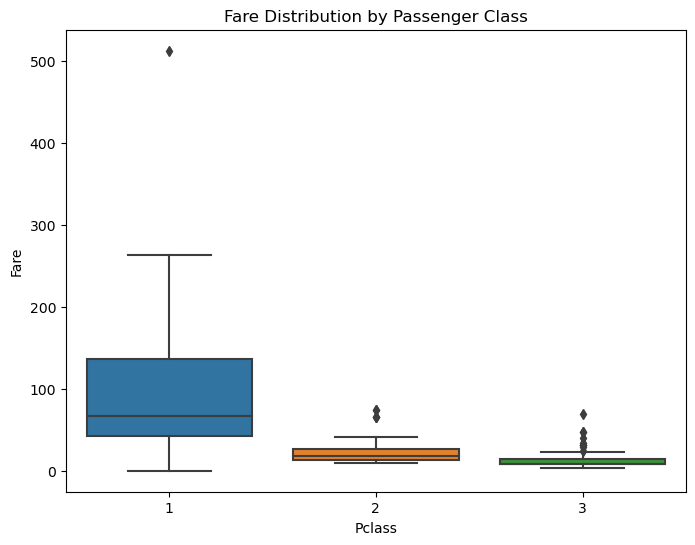

In [38]:
#Box Plot for Fare

plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Fare", data=data)
plt.title("Fare Distribution by Passenger Class")
plt.show()

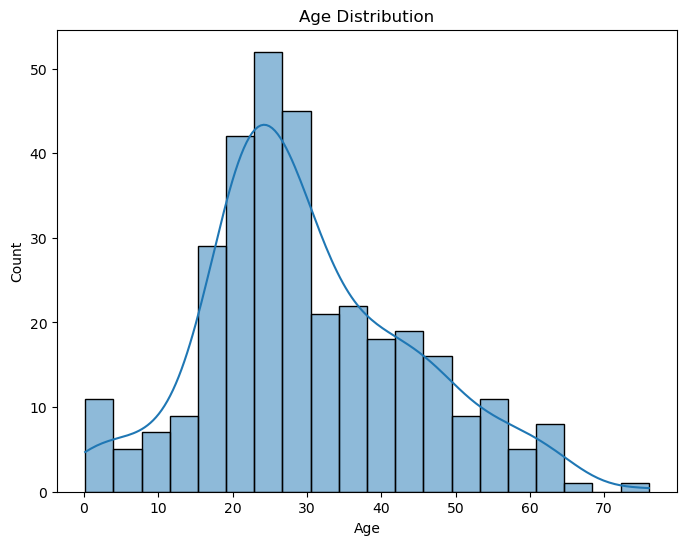

In [39]:
# Histogram for Age

plt.figure(figsize=(8, 6))
sns.histplot(data["Age"].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

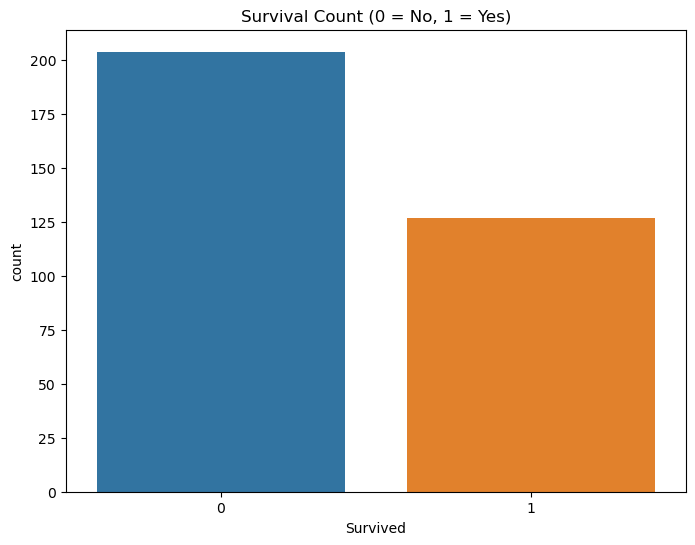

In [40]:
#Bar Plot for Survived

plt.figure(figsize=(8, 6))
sns.countplot(x="Survived", data=data)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()
